## Importing Required Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

## Loading Dataset

In [95]:
df = pd.read_csv("./dataset/Breast_cancer_data.csv")

## Preliminary Investigation

In [96]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [97]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [99]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


## Checking for Duplicates

In [100]:
df[df.duplicated()]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis


## Checking for Outliers

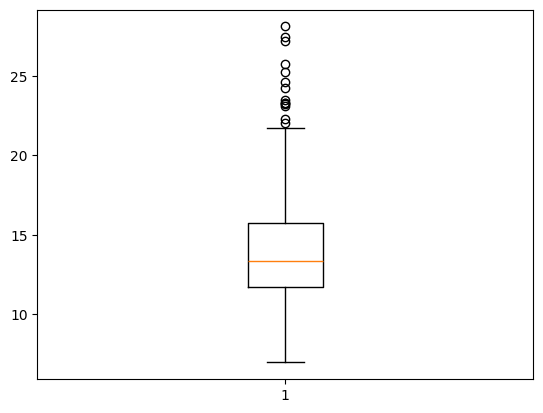

In [101]:
plt.boxplot(df['mean_radius'])
plt.show()

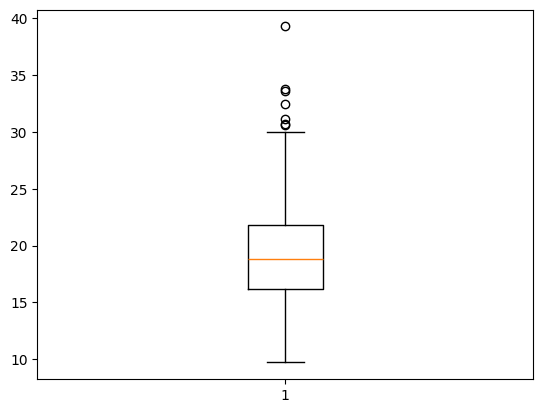

In [102]:
plt.boxplot(df['mean_texture'])
plt.show()

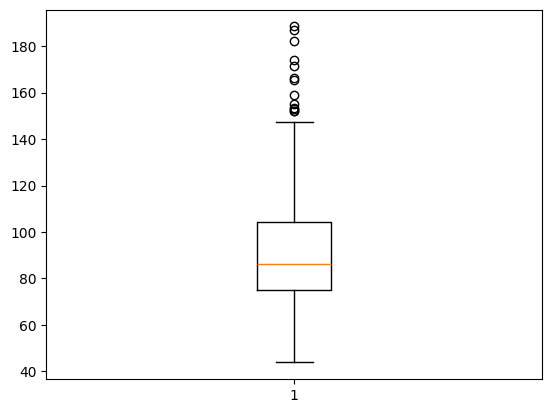

In [103]:
plt.boxplot(df['mean_perimeter'])
plt.show()

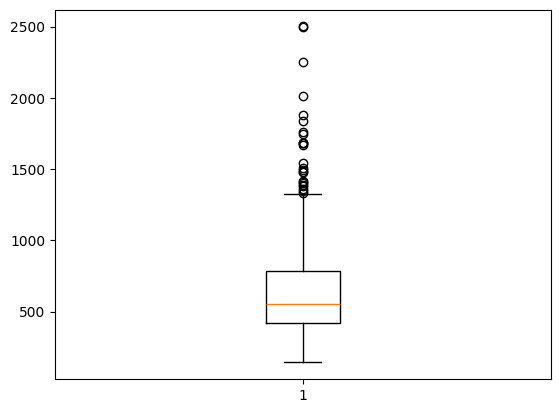

In [104]:
plt.boxplot(df['mean_area'])
plt.show()

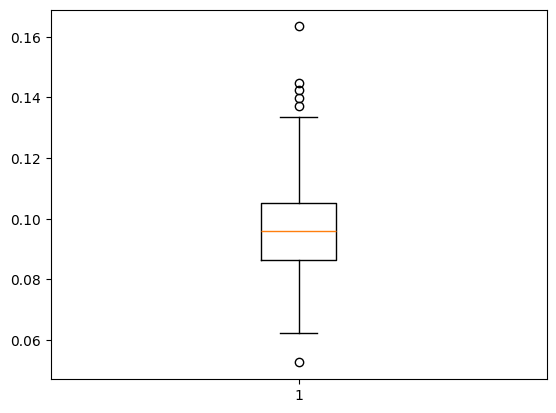

In [105]:
plt.boxplot(df['mean_smoothness'])
plt.show()

## Data Distribution

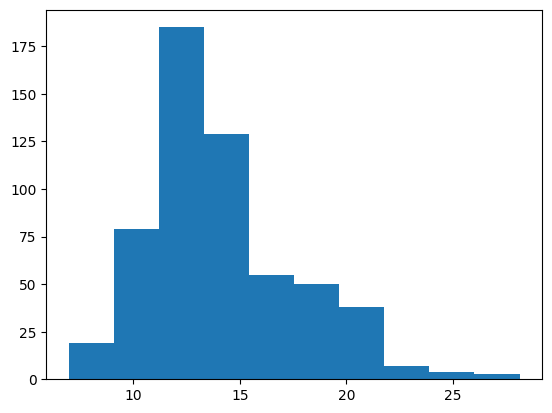

In [106]:
plt.hist(df['mean_radius'])
plt.show()

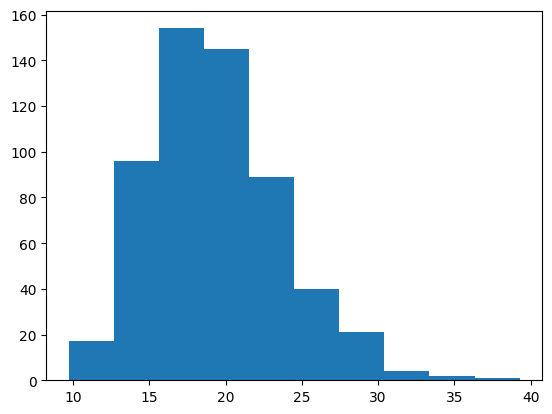

In [107]:
plt.hist(df['mean_texture'])
plt.show()

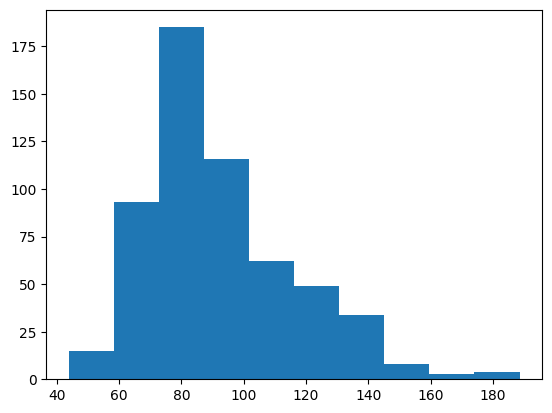

In [108]:
plt.hist(df['mean_perimeter'])
plt.show()

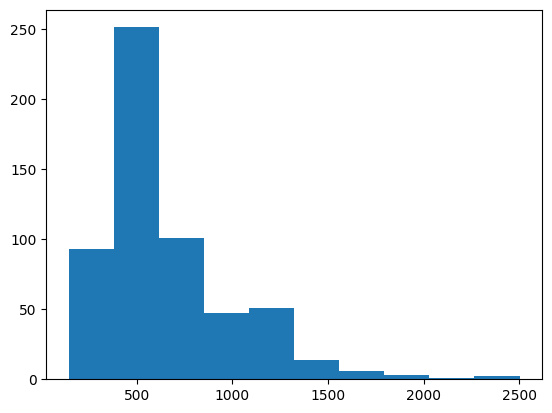

In [109]:
plt.hist(df['mean_area'])
plt.show()

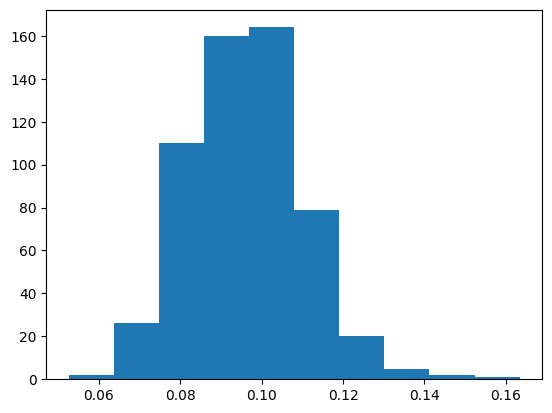

In [110]:
plt.hist(df['mean_smoothness'])
plt.show()

## Checking Skewness

In [111]:
for col in df.columns[:-1]:
    print(df[col].skew())

0.9423795716730992
0.6504495420828159
0.9906504253930081
1.6457321756240424
0.45632376481955844


## Checking whether dataset is balanced

In [112]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

## Checking correlation between features

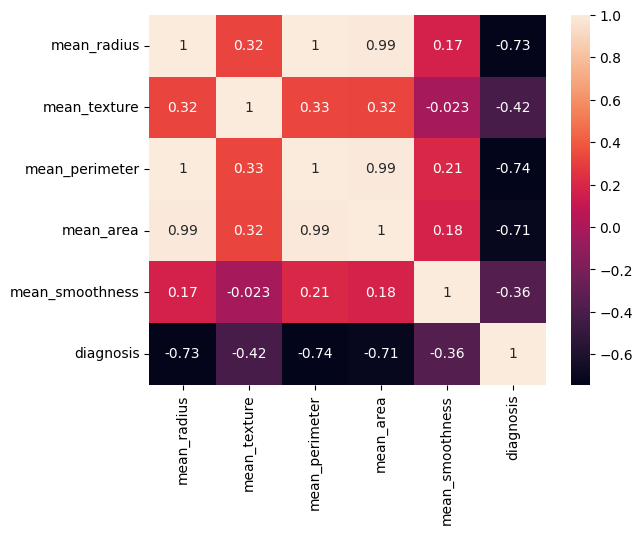

In [113]:
sns.heatmap(df.corr(), annot = True)
plt.show()

## Removing features with high correlation

In [114]:
df.drop(['mean_perimeter', 'mean_area'], axis = 1, inplace = True)

In [115]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis'], dtype='object')

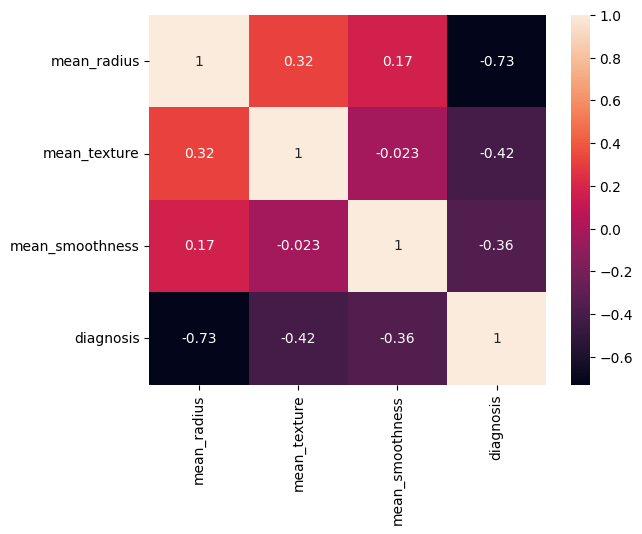

In [116]:
sns.heatmap(df.corr(), annot = True)
plt.show()

## Checking Correlation

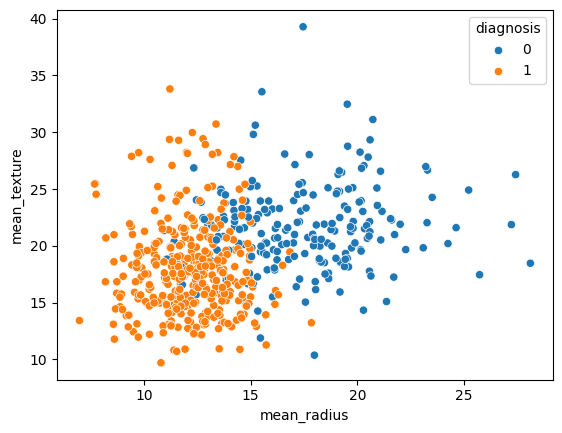

In [117]:
sns.scatterplot(x = df['mean_radius'], y = df['mean_texture'], hue = df['diagnosis'])
plt.show()

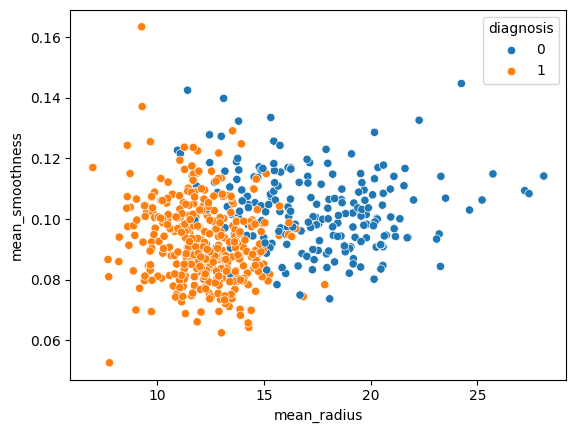

In [118]:
sns.scatterplot(x = df['mean_radius'], y = df['mean_smoothness'], hue = df['diagnosis'])
plt.show()

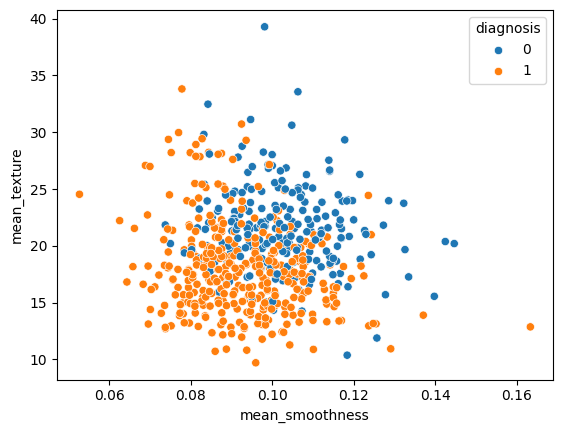

In [119]:
sns.scatterplot(x = df['mean_smoothness'], y = df['mean_texture'], hue = df['diagnosis'])
plt.show()

## Splitting into train and test dataset

In [143]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y, random_state = 0)

In [144]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 3)
(171, 3)
(398,)
(171,)


In [145]:
print(y_train.value_counts())
print(y_test.value_counts())

diagnosis
1    250
0    148
Name: count, dtype: int64
diagnosis
1    107
0     64
Name: count, dtype: int64


In [146]:
y_train = y_train.reset_index().drop('index', axis = 1)
y_test = y_test.reset_index().drop('index', axis = 1)

## Standardizing Values

In [148]:
X_train.describe()

,mean_radius,mean_texture,mean_smoothness
count,398.000000,398.000000,398.000000
mean,14.104367,19.219322,0.096044
std,3.622681,4.271260,0.013946
min,7.691000,9.710000,0.052630
25%,11.547500,16.172500,0.085565
50%,13.225000,18.825000,0.095785
75%,15.772500,21.802500,0.105400
max,28.110000,39.280000,0.142500


In [149]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))

In [150]:
X_train.describe()

,0,1,2
count,3.980000e+02,3.980000e+02,3.980000e+02
mean,-3.704463e-16,1.383595e-16,3.749095e-16
std,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.772565e+00,-2.229153e+00,-3.117028e+00
25%,-7.066824e-01,-7.142287e-01,-7.523932e-01
50%,-2.430448e-01,-9.243594e-02,-1.862754e-02
75%,4.610488e-01,6.055426e-01,6.717009e-01
max,3.870962e+00,4.702577e+00,3.335371e+00


In [151]:
X_test.describe()

,mean_radius,mean_texture,mean_smoothness
count,171.000000,171.000000,171.000000
mean,14.180649,19.453333,0.097095
std,3.292679,4.377816,0.014350
min,6.981000,10.910000,0.066130
25%,12.040000,16.190000,0.087440
50%,13.480000,18.870000,0.096760
75%,16.090000,21.695000,0.104900
max,24.250000,33.560000,0.163400


In [152]:
X_test = pd.DataFrame(scaler.transform(X_test))

In [153]:
X_test.describe()

,0,1,2
count,171.000000,171.000000,171.000000
mean,0.021083,0.054856,0.075454
std,0.910051,1.026237,1.030315
min,-1.968800,-1.947851,-2.147768
25%,-0.570562,-0.710126,-0.617774
50%,-0.172566,-0.081887,0.051375
75%,0.548801,0.580343,0.635802
max,2.804112,3.361708,4.835928


## Saving Scaler to file

In [163]:
joblib.dump(scaler, './models/preprocessor.joblib')

['./models/preprocessor.joblib']

## Writing data to train.csv and test.csv

In [154]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [155]:
train.shape

(398, 4)

In [156]:
train

,0,1,2,diagnosis
0,-0.249954,-0.419449,-1.715550,1
1,-0.797199,3.420312,-1.309897,1
2,0.120403,1.950514,1.281976,0
3,0.275179,-0.663243,1.360952,1
4,0.880465,0.682314,-0.434691,0
...,...,...,...,...
393,3.072206,1.333995,0.736318,0
394,-0.913281,-2.229153,-0.007499,1
395,-0.841421,-0.998460,0.520927,1
396,-0.584382,1.329307,0.499388,1


In [157]:
test.shape

(171, 4)

In [158]:
test

,0,1,2,diagnosis
0,0.822424,1.859091,0.210764,0
1,-0.368800,0.762016,-0.394485,0
2,0.040251,0.687003,0.635802,0
3,-0.457244,-0.658555,-0.064937,1
4,0.620662,0.954239,0.098761,0
...,...,...,...,...
166,0.208847,-0.534313,-0.488539,1
167,-0.136636,1.350405,-0.083604,0
168,-0.305232,0.365851,1.253257,1
169,0.195027,-1.059409,-0.813062,1


In [160]:
train.to_csv("./dataset/train.csv", index = False)
test.to_csv("./dataset/test.csv", index = False)